In [19]:
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization
from spectral_cube import SpectralCube
import warnings
import pandas as pd

tbl = Table.read('table234.tex', format='latex')

In [20]:
a = tbl["R.A."]

RA_offset = []
for i in a:
    d = i.replace("$-$", "-")
    RA_offset.append(float(d))

tbl["R.A."] = RA_offset

In [21]:
a = np.copy(tbl["R.A."])

In [22]:
b = tbl["decl."]

decl_offset = []
for i in b:
    d = i.replace("$-$", "-")
    decl_offset.append(float(d))

tbl["decl."] = decl_offset

In [23]:
b = np.copy(tbl["decl."])
coords = SkyCoord(a,b, unit='mas')

In [26]:

c = SkyCoord('19h23m40.051s', '+14d31m05.483s', frame='fk5')
c.ra

<Longitude 290.91687917 deg>

In [10]:
def w51north_settings():

    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

In [33]:
fn = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor'
fh = SpectralCube.read(fn, format='casa_image')
cen = fh.shape[1]/2, fh.shape[2]/2

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh[0].header)

/home/dealderod/.local/lib/python3.8/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


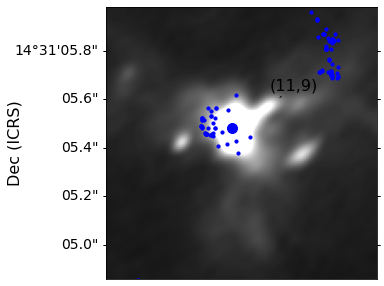

In [34]:
fig, ax = plt.subplots(figsize=(5,5))

ax = pl.subplot(projection=ww)
w51north_settings()

im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='linear', max_percent=99.999))

ax.scatter(c.ra.deg, c.dec.deg, s=100, c = "blue", transform=ax.get_transform('world'))
ax.scatter(c.ra.deg + coords.ra.deg, c.dec.deg + coords.dec.deg , s=10, c = "blue", transform=ax.get_transform('world'))

ax.axis([cen[0]-180,cen[0]-20,cen[1]-20,cen[1]+140])

ax.annotate('(11,9)', (290.916824, 14.51822272), xytext=(290.916824+0.00001, 14.51822272+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize=16)

plt.show()


In [87]:
c.ra.deg

290.91620833333326